In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib

In [14]:

# Mapping
disease_labels = [
    "Anemia",
    "Diabetes",
    "Healthy",
    "Thalasse",
    "Thromboc"
]


In [15]:

# Load your data
# Replace 'your_data.csv' with your actual file path
df = pd.read_csv('/content/Final model trainer.csv')

# Separate features and targets
# Assuming first 24 columns are features and last 5 are disease indicators
feature_columns = df.columns[:24]  # First 24 columns
disease_columns = df.columns[24:]  # Last 5 columns (one-hot encoded diseases)

X = df[feature_columns].values
y_onehot = df[disease_columns].values



In [16]:
# Convert one-hot to single label for training
y = np.argmax(y_onehot, axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [17]:
# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

print("Training Random Forest model...")
rf_model.fit(X_train_scaled, y_train)



Training Random Forest model...


RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [18]:
# Predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

# Convert predictions back to one-hot encoding
y_pred_onehot = np.zeros((len(y_pred), len(DISEASE_MAPPING)))
y_pred_onehot[np.arange(len(y_pred)), y_pred] = 1



In [20]:
# Evaluation
print("\n" + "="*60)
print("MODEL EVALUATION")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=list(DISEASE_MAPPING.values())
))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




MODEL EVALUATION

Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

  Heart Disease       1.00      1.00      1.00       125
       Diabetes       1.00      1.00      1.00       108
  Liver Disease       1.00      1.00      1.00       111
 Kidney Disease       1.00      1.00      1.00       102
Thyroid Disease       1.00      1.00      1.00        25

       accuracy                           1.00       471
      macro avg       1.00      1.00      1.00       471
   weighted avg       1.00      1.00      1.00       471


Confusion Matrix:
[[125   0   0   0   0]
 [  0 108   0   0   0]
 [  0   0 111   0   0]
 [  0   0   0 102   0]
 [  0   0   0   0  25]]


In [28]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*60)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*60)
print(feature_importance.head(24).to_string(index=False))




TOP 10 MOST IMPORTANT FEATURES
                                  feature  importance
              Mean Corpuscular Hemoglobin    0.092352
                                Platelets    0.086673
                               Hemoglobin    0.062680
                  Mean Corpuscular Volume    0.053086
                              Cholesterol    0.052335
                        White Blood Cells    0.049543
                          Red Blood Cells    0.048278
                       C-reactive Protein    0.048229
                          HDL Cholesterol    0.047930
                               Hematocrit    0.045089
                               Heart Rate    0.043310
                 Diastolic Blood Pressure    0.034995
                                      ALT    0.033685
Mean Corpuscular Hemoglobin Concentration    0.032447
                                 Troponin    0.030315
                          LDL Cholesterol    0.029789
                                      AST    0.029

✓ Visualization saved as 'feature_importance.png'


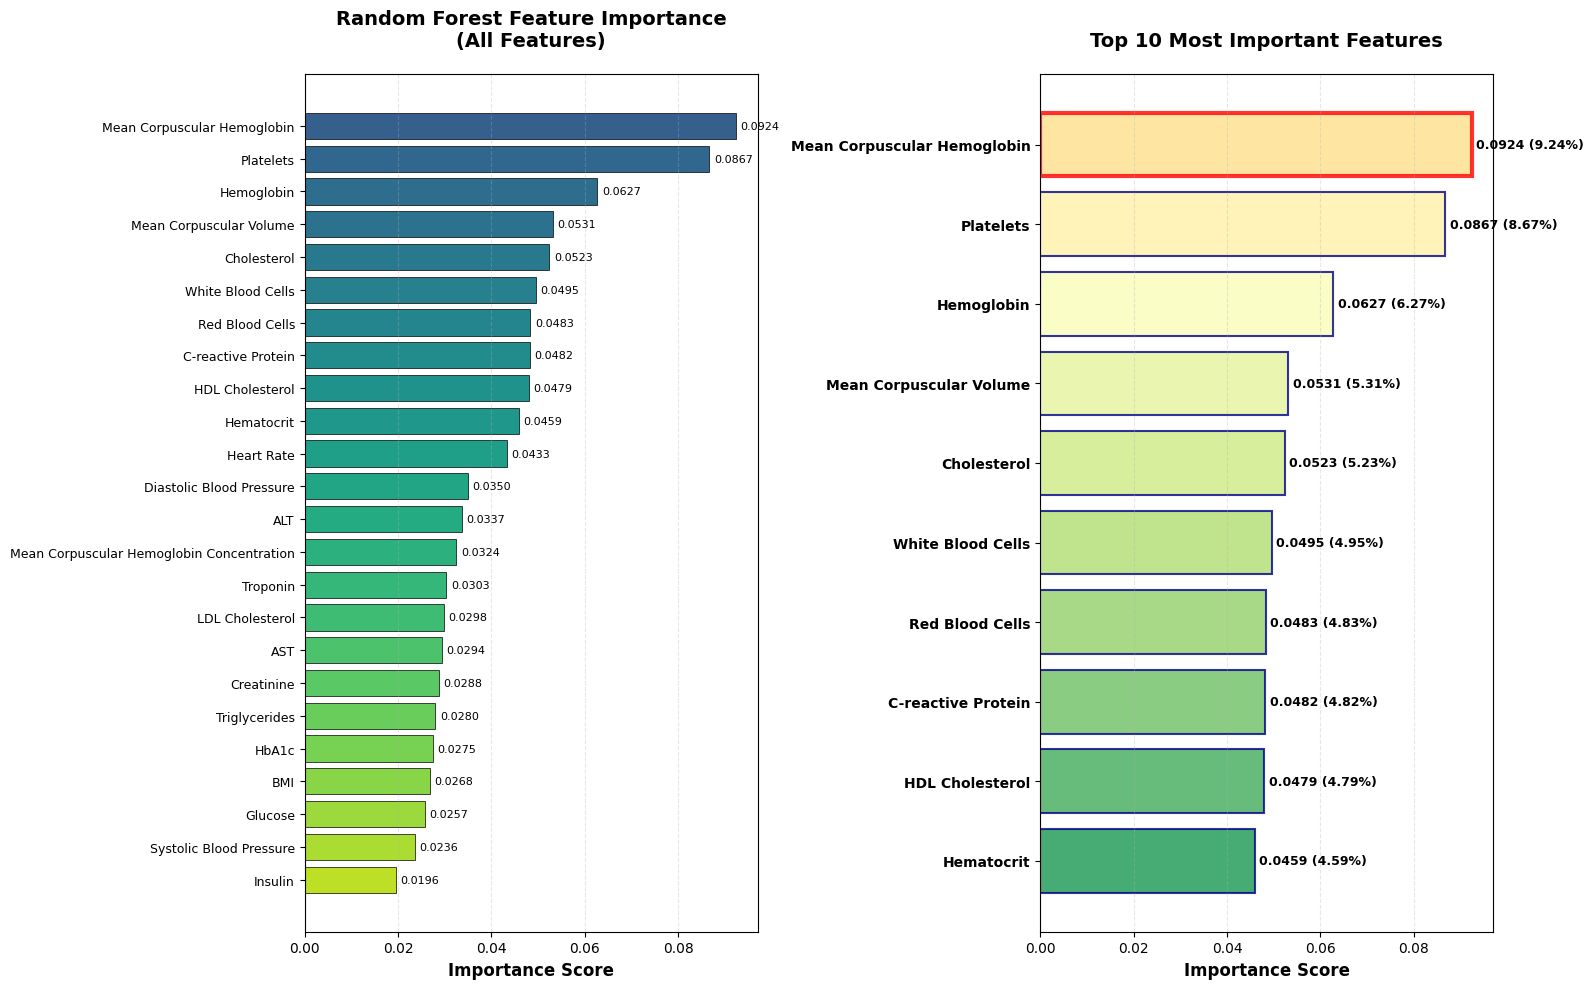

✓ Vertical visualization saved as 'feature_importance_vertical.png'


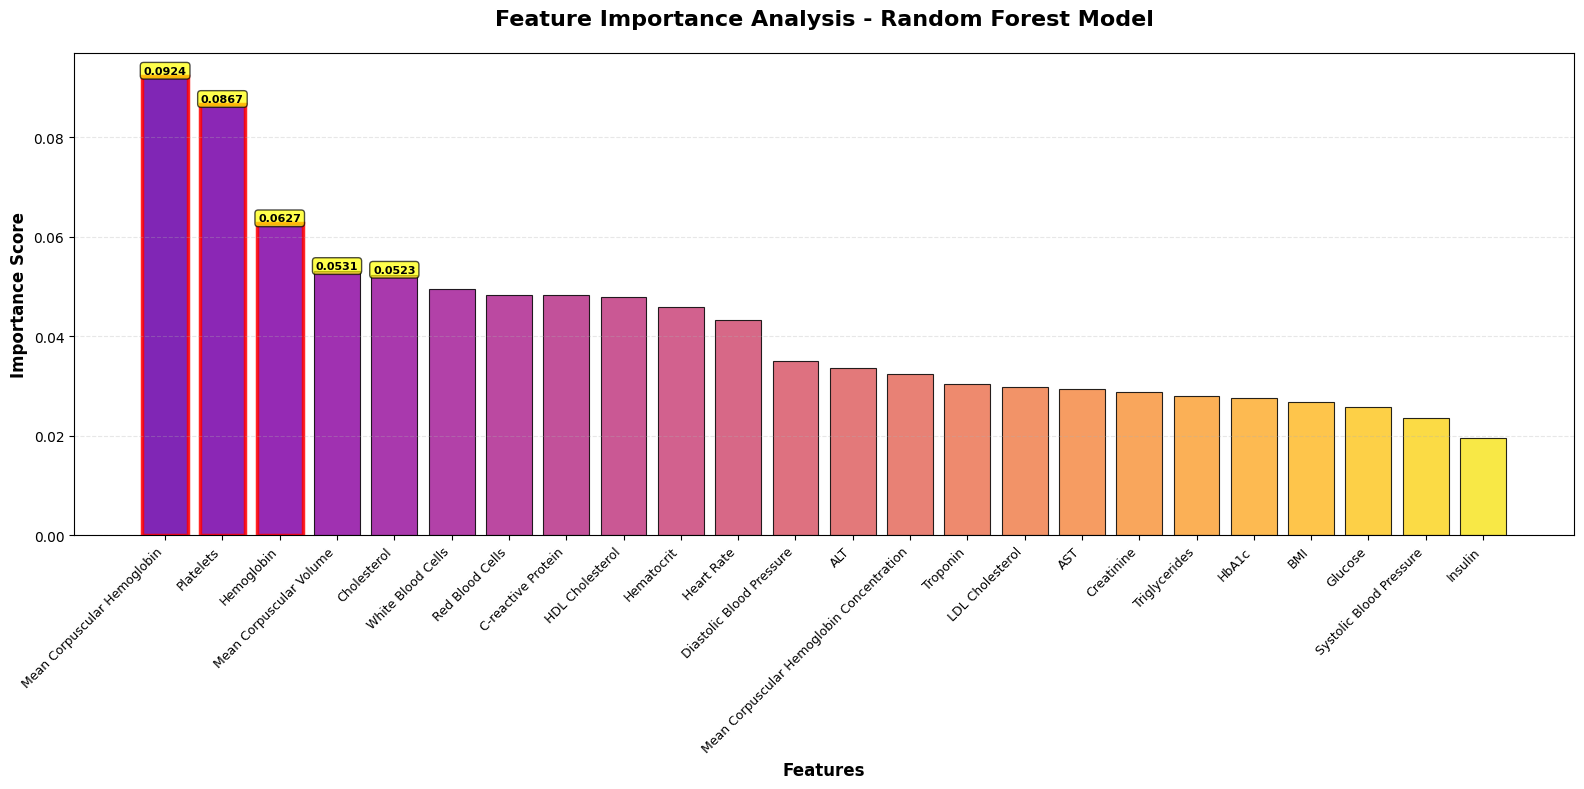


FEATURE IMPORTANCE STATISTICS
Total Features: 24
Mean Importance: 0.041700
Std Importance: 0.018200
Max Importance: 0.092352 (Mean Corpuscular Hemoglobin)
Min Importance: 0.019557 (Insulin)

Top 5 features contribute: 34.71% of total importance
Top 10 features contribute: 58.70% of total importance


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance data
features = [
    'Mean Corpuscular Hemoglobin',
    'Platelets',
    'Hemoglobin',
    'Mean Corpuscular Volume',
    'Cholesterol',
    'White Blood Cells',
    'Red Blood Cells',
    'C-reactive Protein',
    'HDL Cholesterol',
    'Hematocrit',
    'Heart Rate',
    'Diastolic Blood Pressure',
    'ALT',
    'Mean Corpuscular Hemoglobin Concentration',
    'Troponin',
    'LDL Cholesterol',
    'AST',
    'Creatinine',
    'Triglycerides',
    'HbA1c',
    'BMI',
    'Glucose',
    'Systolic Blood Pressure',
    'Insulin'
]

importance = [
    0.092352,
    0.086673,
    0.062680,
    0.053086,
    0.052335,
    0.049543,
    0.048278,
    0.048229,
    0.047930,
    0.045889,
    0.043310,
    0.034995,
    0.033685,
    0.032447,
    0.030315,
    0.029789,
    0.029410,
    0.028761,
    0.027960,
    0.027484,
    0.026847,
    0.025687,
    0.023556,
    0.019557
]

# Create figure with better size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))

# ============================================================
# Plot 1: Horizontal Bar Chart (All Features)
# ============================================================
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(features)))
y_pos = np.arange(len(features))

ax1.barh(y_pos, importance, color=colors, edgecolor='black', linewidth=0.5)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(features, fontsize=9)
ax1.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax1.set_title('Random Forest Feature Importance\n(All Features)',
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.invert_yaxis()

# Add value labels on bars
for i, v in enumerate(importance):
    ax1.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=8)

# ============================================================
# Plot 2: Top 10 Features with Different Style
# ============================================================
top_10_features = features[:10]
top_10_importance = importance[:10]

colors_top10 = plt.cm.RdYlGn(np.linspace(0.4, 0.9, 10))
y_pos_top10 = np.arange(len(top_10_features))

bars = ax2.barh(y_pos_top10, top_10_importance, color=colors_top10,
                edgecolor='darkblue', linewidth=1.5, alpha=0.8)

ax2.set_yticks(y_pos_top10)
ax2.set_yticklabels(top_10_features, fontsize=10, fontweight='bold')
ax2.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Most Important Features',
              fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.invert_yaxis()

# Add percentage labels
for i, v in enumerate(top_10_importance):
    percentage = v * 100
    ax2.text(v + 0.001, i, f'{v:.4f} ({percentage:.2f}%)',
             va='center', fontsize=9, fontweight='bold')

# Highlight the most important feature
bars[0].set_edgecolor('red')
bars[0].set_linewidth(3)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved as 'feature_importance.png'")
plt.show()


# ============================================================
# Additional Visualization: Vertical Bar Chart with Rotation
# ============================================================
fig2, ax3 = plt.subplots(figsize=(16, 8))

x_pos = np.arange(len(features))
colors_gradient = plt.cm.plasma(np.linspace(0.2, 0.95, len(features)))

bars = ax3.bar(x_pos, importance, color=colors_gradient,
               edgecolor='black', linewidth=0.8, alpha=0.85)

ax3.set_xticks(x_pos)
ax3.set_xticklabels(features, rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Importance Score', fontsize=12, fontweight='bold')
ax3.set_xlabel('Features', fontsize=12, fontweight='bold')
ax3.set_title('Feature Importance Analysis - Random Forest Model',
              fontsize=16, fontweight='bold', pad=20)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on top of bars
for i, (bar, val) in enumerate(zip(bars, importance)):
    height = bar.get_height()
    if i < 5:  # Label top 5
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.4f}',
                ha='center', va='bottom', fontsize=8, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Highlight top 3 features
for i in range(3):
    bars[i].set_edgecolor('red')
    bars[i].set_linewidth(2.5)

plt.tight_layout()
plt.savefig('feature_importance_vertical.png', dpi=300, bbox_inches='tight')
print("✓ Vertical visualization saved as 'feature_importance_vertical.png'")
plt.show()


# ============================================================
# Statistical Summary
# ============================================================
print("\n" + "="*60)
print("FEATURE IMPORTANCE STATISTICS")
print("="*60)
print(f"Total Features: {len(features)}")
print(f"Mean Importance: {np.mean(importance):.6f}")
print(f"Std Importance: {np.std(importance):.6f}")
print(f"Max Importance: {np.max(importance):.6f} ({features[0]})")
print(f"Min Importance: {np.min(importance):.6f} ({features[-1]})")
print(f"\nTop 5 features contribute: {sum(importance[:5]):.2%} of total importance")
print(f"Top 10 features contribute: {sum(importance[:10]):.2%} of total importance")
print("="*60)

In [27]:
# Save model and scaler
joblib.dump(rf_model, 'disease_predictor_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
print("\n✓ Model saved as 'disease_predictor_model.pkl'")
print("✓ Scaler saved as 'feature_scaler.pkl'")





✓ Model saved as 'disease_predictor_model.pkl'
✓ Scaler saved as 'feature_scaler.pkl'


In [23]:
# ============================================================
# PREDICTION FUNCTION
# ============================================================
def predict_disease(patient_data, return_onehot=True):
    """
    Predict disease for new patient data

    Parameters:
    -----------
    patient_data : array-like, shape (n_features,) or (n_samples, n_features)
        Patient medical data with 24 features
    return_onehot : bool
        If True, returns one-hot encoded predictions

    Returns:
    --------
    dict : Dictionary containing predictions
    """
    # Load model and scaler
    model = joblib.load('disease_predictor_model.pkl')
    scaler = joblib.load('feature_scaler.pkl')

    # Ensure 2D array
    if len(patient_data.shape) == 1:
        patient_data = patient_data.reshape(1, -1)

    # Scale features
    patient_data_scaled = scaler.transform(patient_data)

    # Predict
    predictions = model.predict(patient_data_scaled)
    probabilities = model.predict_proba(patient_data_scaled)

    results = []
    for i, pred in enumerate(predictions):
        disease_name = DISEASE_MAPPING[pred]
        confidence = probabilities[i][pred]

        # One-hot encoding
        onehot = np.zeros(len(DISEASE_MAPPING))
        onehot[pred] = 1

        result = {
            'disease_name': disease_name,
            'disease_code': int(pred),
            'confidence': float(confidence),
            'all_probabilities': {DISEASE_MAPPING[j]: float(probabilities[i][j])
                                 for j in range(len(DISEASE_MAPPING))}
        }

        if return_onehot:
            result['one_hot_encoding'] = onehot.tolist()

        results.append(result)

    return results if len(results) > 1 else results[0]




In [24]:
# ============================================================
# EXAMPLE USAGE
# ============================================================
print("\n" + "="*60)
print("EXAMPLE PREDICTIONS")
print("="*60)

# Test with first 3 samples from test set
sample_patients = X_test[:3]
predictions = predict_disease(sample_patients)

for i, pred in enumerate(predictions):
    print(f"\nPatient {i+1}:")
    print(f"  Predicted Disease: {pred['disease_name']}")
    print(f"  Confidence: {pred['confidence']:.2%}")
    print(f"  One-hot Encoding: {pred['one_hot_encoding']}")
    print(f"  All Probabilities:")
    for disease, prob in pred['all_probabilities'].items():
        print(f"    - {disease}: {prob:.2%}")

print("\n" + "="*60)
print("Model training complete!")
print("="*60)


EXAMPLE PREDICTIONS

Patient 1:
  Predicted Disease: Heart Disease
  Confidence: 100.00%
  One-hot Encoding: [1.0, 0.0, 0.0, 0.0, 0.0]
  All Probabilities:
    - Heart Disease: 100.00%
    - Diabetes: 0.00%
    - Liver Disease: 0.00%
    - Kidney Disease: 0.00%
    - Thyroid Disease: 0.00%

Patient 2:
  Predicted Disease: Liver Disease
  Confidence: 100.00%
  One-hot Encoding: [0.0, 0.0, 1.0, 0.0, 0.0]
  All Probabilities:
    - Heart Disease: 0.00%
    - Diabetes: 0.00%
    - Liver Disease: 100.00%
    - Kidney Disease: 0.00%
    - Thyroid Disease: 0.00%

Patient 3:
  Predicted Disease: Kidney Disease
  Confidence: 100.00%
  One-hot Encoding: [0.0, 0.0, 0.0, 1.0, 0.0]
  All Probabilities:
    - Heart Disease: 0.00%
    - Diabetes: 0.00%
    - Liver Disease: 0.00%
    - Kidney Disease: 100.00%
    - Thyroid Disease: 0.00%

Model training complete!
